In [1]:
import numpy as np
import pandas as pd #to read dataset


#for text preprocessing
import re 
import string

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#supress display of warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv("SMSSpamCollection.txt",sep='\t',names=["Label","Message"])
data.head()

,Label,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
data.shape

(5572, 2)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Label    5572 non-null   object
 1   Message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [5]:
data.isnull().sum()

Label      0
Message    0
dtype: int64

In [6]:
data.duplicated().sum()

403

In [7]:
data=data.drop_duplicates()

In [8]:
data.duplicated().sum()

0

In [9]:
data.shape

(5169, 2)

# 1.Exploratory Data Analysis

In [10]:
data['Label'].value_counts()

ham     4516
spam     653
Name: Label, dtype: int64

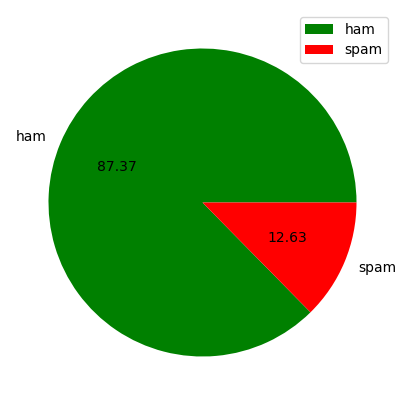

In [11]:
plt.figure(figsize=(10,5))
plt.pie(data['Label'].value_counts(),labels=['ham','spam'],colors=['green','red'],autopct='%0.2f')
plt.legend()
plt.show()

In [12]:
data['Message'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [13]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PUJITHA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [14]:
#Find number of characters
data['num_characters']=data['Message'].apply(len)
data.head()

,Label,Message,num_characters
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [15]:
#For number of words
from nltk.tokenize import word_tokenize
data['Message'].apply(lambda x:nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568      [Will, ü, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: Message, Length: 5169, dtype: object

In [16]:
data['num_words']=data['Message'].apply(lambda x:len(nltk.word_tokenize(x)))
data.head()

,Label,Message,num_characters,num_words
0,ham,"Go until jurong point, crazy.. Available only ...",111,24
1,ham,Ok lar... Joking wif u oni...,29,8
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,ham,U dun say so early hor... U c already then say...,49,13
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15


In [17]:
#For number of sentences
data['num_sentences']=data['Message'].apply(lambda x:len(nltk.sent_tokenize(x)))
data.head()

,Label,Message,num_characters,num_words,num_sentences
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2
1,ham,Ok lar... Joking wif u oni...,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,ham,U dun say so early hor... U c already then say...,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [18]:
#For ham messages
data[data['Label']=='ham'][['num_characters','num_words','num_sentences']].describe()

#on an avg ham msgs contain 71 chars,13 words,1.8 sentence

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.905890,17.264836,1.806244
std,56.715046,13.587852,1.281910
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [19]:
data[data['Label']=='spam'][['num_characters','num_words','num_sentences']].describe()

#on an avg spam msgs contain 137 chars,27 words,2.9 sentences

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.704441,27.762634,2.983155
std,29.821348,6.993008,1.489645
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,8.000000


# spam msgs are quite longer than ham msgs

<Axes: xlabel='num_characters', ylabel='Count'>

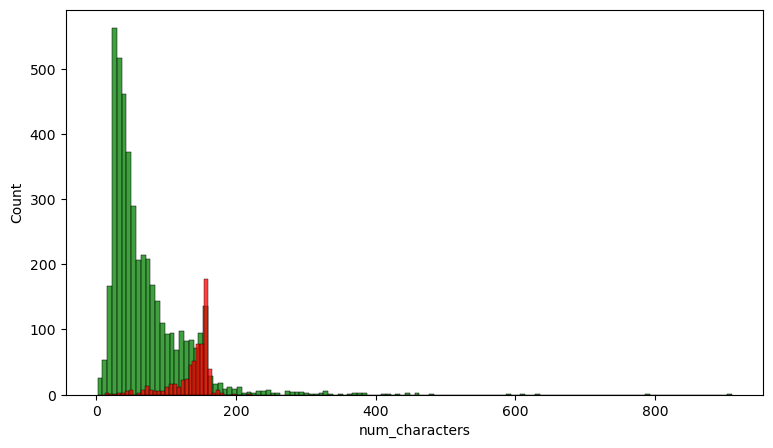

In [20]:
#for characters
plt.figure(figsize=(9,5))
sns.histplot(data[data['Label']=='ham']['num_characters'],color='green')
sns.histplot(data[data['Label']=='spam']['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

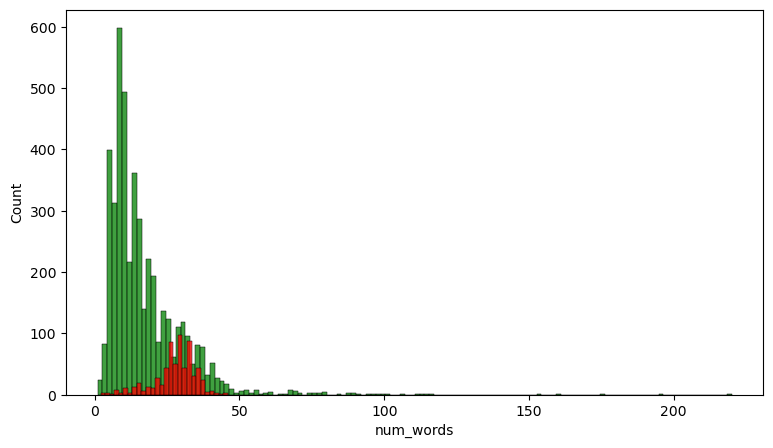

In [21]:
#for words
plt.figure(figsize=(9,5))
sns.histplot(data[data['Label']=='ham']['num_words'],color='green')
sns.histplot(data[data['Label']=='spam']['num_words'],color='red')

In [22]:
pip install wordcloud

# Word Cloud

In [23]:
from wordcloud import WordCloud

In [24]:
ham_msg_text=data[data['Label']=='ham'].Message
spam_msg_text=data[data.Label=='spam'].Message

In [25]:
ham_msg_text

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
6       Even my brother is not like to speak with me. ...
                              ...                        
5565                                         Huh y lei...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 4516, dtype: object

In [26]:
spam_msg_text

2       Free entry in 2 a wkly comp to win FA Cup fina...
5       FreeMsg Hey there darling it's been 3 week's n...
8       WINNER!! As a valued network customer you have...
9       Had your mobile 11 months or more? U R entitle...
11      SIX chances to win CASH! From 100 to 20,000 po...
                              ...                        
5537    Want explicit SEX in 30 secs? Ring 02073162414...
5540    ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547    Had your contract mobile 11 Mnths? Latest Moto...
5566    REMINDER FROM O2: To get 2.50 pounds free call...
5567    This is the 2nd time we have tried 2 contact u...
Name: Message, Length: 653, dtype: object

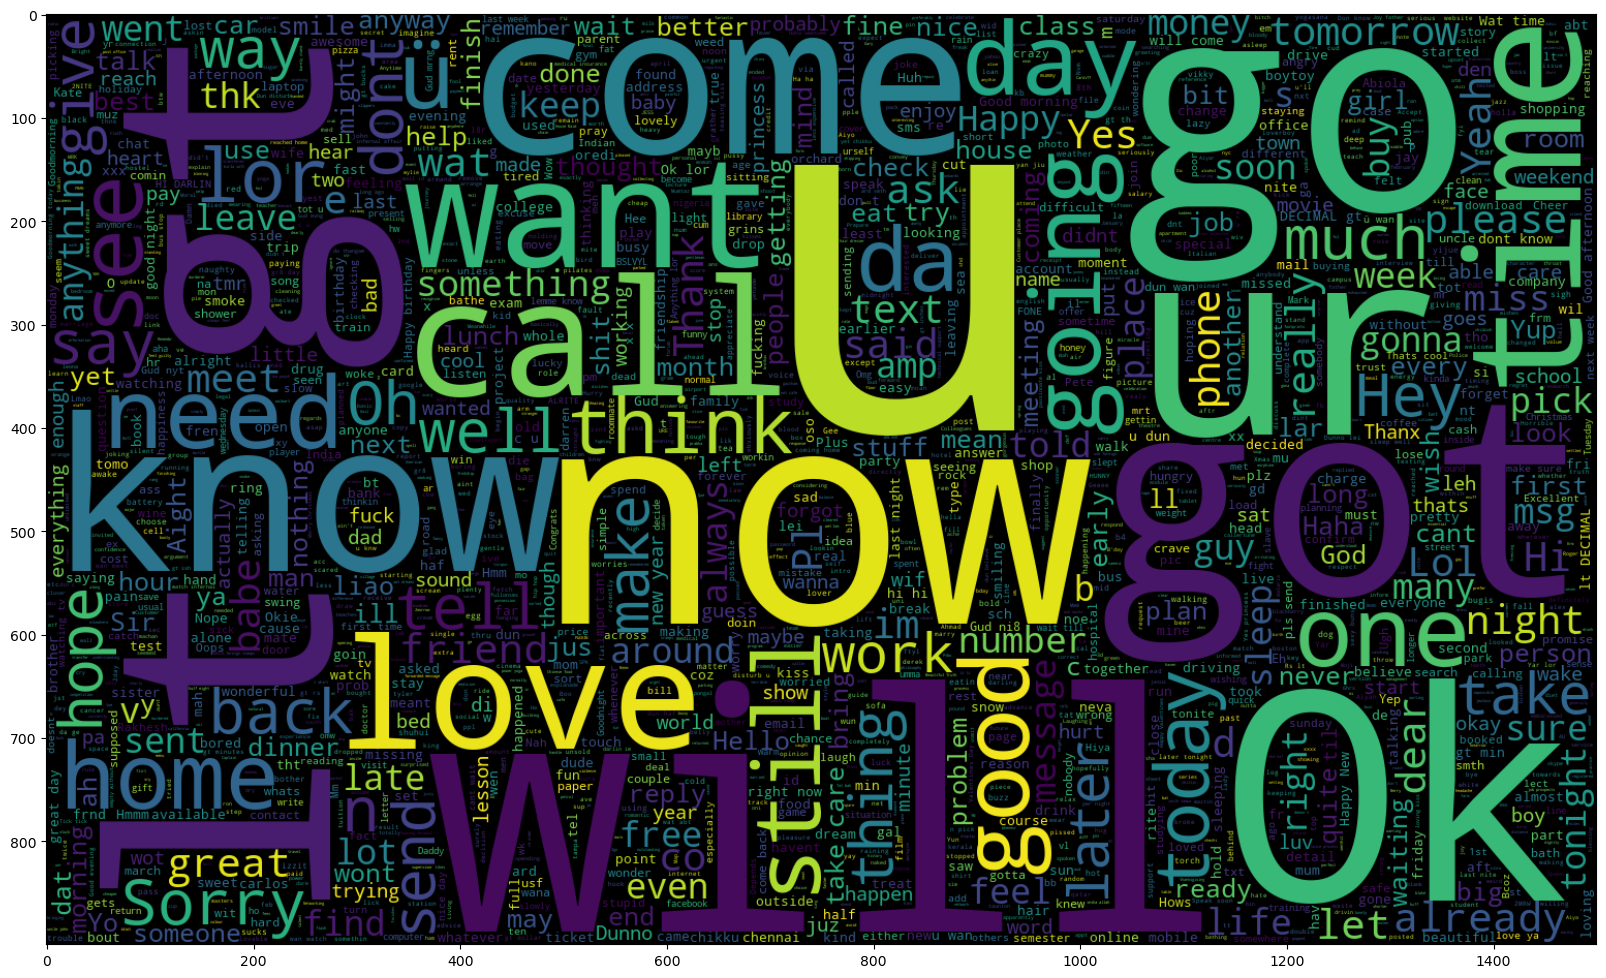

In [27]:
#Word cloud for ham msgs

plt.figure(figsize=(20,22))
wc=WordCloud(width=1500,height=900,max_words=2500).generate(" ".join(ham_msg_text))
plt.imshow(wc,interpolation='bilinear')

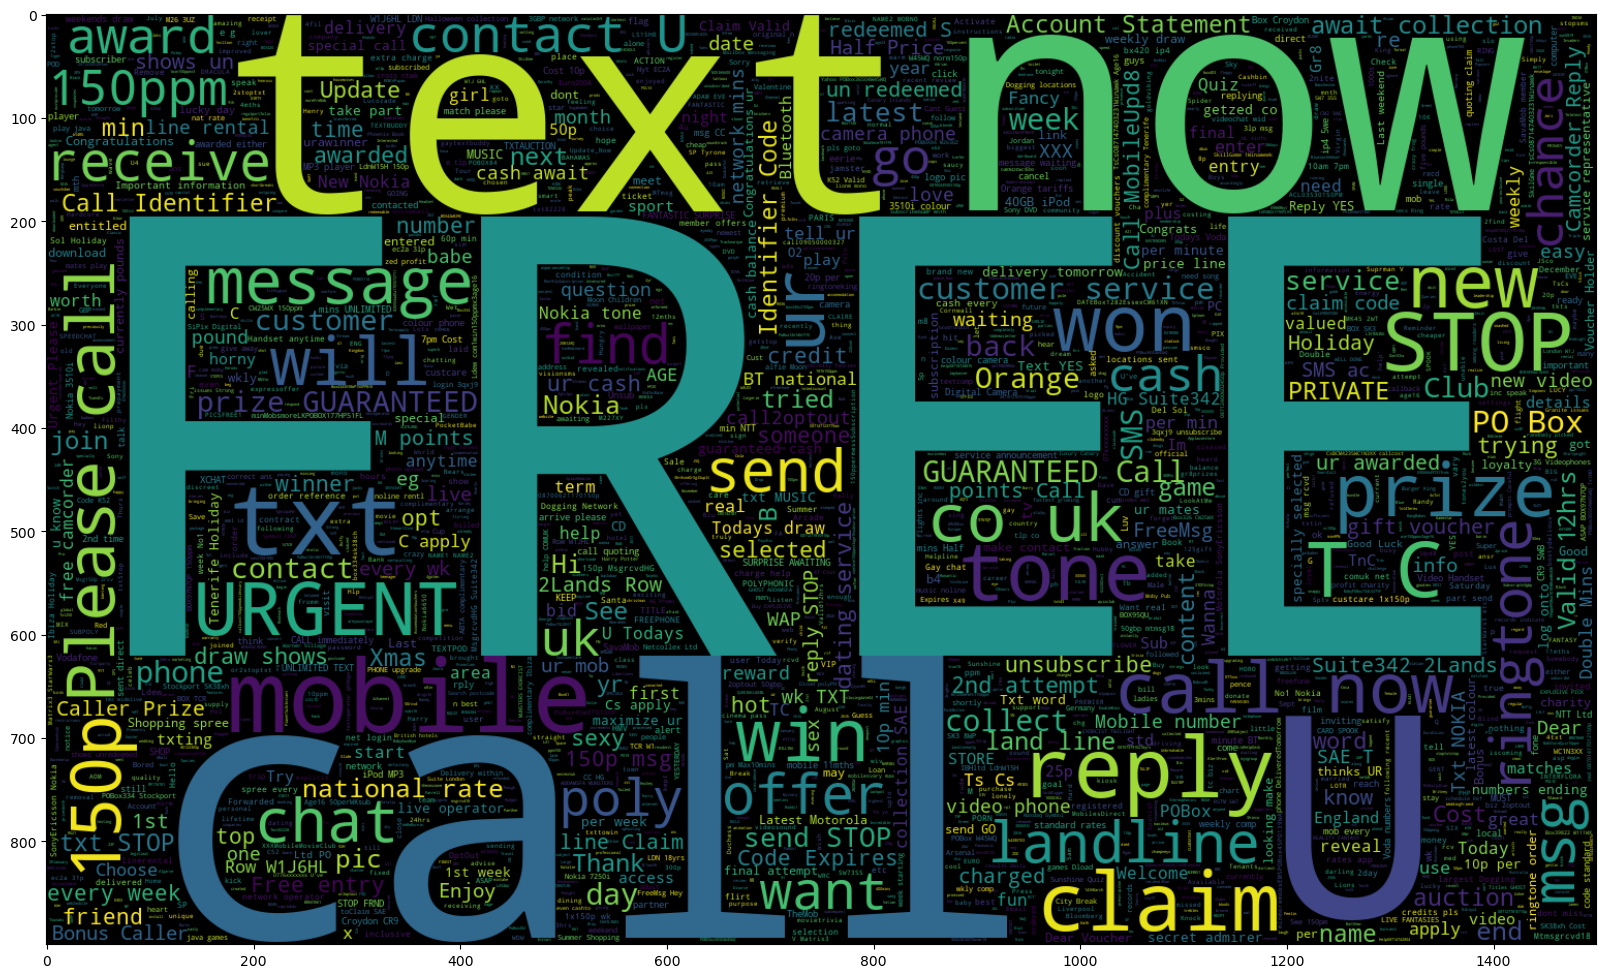

In [28]:
#Word cloud for spam msgs

plt.figure(figsize=(20,22))
wc=WordCloud(width=1500,height=900,max_words=2500).generate(" ".join(spam_msg_text))
plt.imshow(wc,interpolation='bilinear')

# Data Preprocessing

In [29]:
u=data['Message'][5]
u

"FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv"

In [30]:
v=data['Message'][8]
v

'WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.'

# 1.Remove punctuation

In [31]:
#use str module,string library

def remove_punc(text):
    trans=str.maketrans('','',string.punctuation)
    return text.translate(trans)

In [32]:
data['Message']=data['Message'].apply(remove_punc)

In [33]:
u=data['Message'][5]
u

'FreeMsg Hey there darling its been 3 weeks now and no word back Id like some fun you up for it still Tb ok XxX std chgs to send £150 to rcv'

In [34]:
v=data['Message'][8]
v

'WINNER As a valued network customer you have been selected to receivea £900 prize reward To claim call 09061701461 Claim code KL341 Valid 12 hours only'

# 2.Remove Special Characters

In [35]:
def remove_spl(text):
    t=re.sub('[^a-zA-Z]',' ',text)
    return t

#all numerical and spl chars removed

In [36]:
data['Message']=data['Message'].apply(remove_spl)

In [37]:
u=data['Message'][5]
u

'FreeMsg Hey there darling its been   weeks now and no word back Id like some fun you up for it still Tb ok XxX std chgs to send      to rcv'

In [38]:
v=data['Message'][8]
v

'WINNER As a valued network customer you have been selected to receivea      prize reward To claim call             Claim code KL    Valid    hours only'

# 3.Removing stopwords

In [39]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PUJITHA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [40]:
from nltk.corpus import stopwords
sw=stopwords.words('english')

In [41]:
sw

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [42]:
len(sw)

179

In [43]:
def remove_sws(text):
    s=[word.lower() for word in text.split() if word.lower() not in sw]
    return " ".join(s)

In [44]:
data['Message']=data['Message'].apply(remove_sws)

In [45]:
u=data['Message'][5]
u

'freemsg hey darling weeks word back id like fun still tb ok xxx std chgs send rcv'

In [46]:
v=data['Message'][8]
v

'winner valued network customer selected receivea prize reward claim call claim code kl valid hours'

# 4.Lemmatization

In [47]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PUJITHA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\PUJITHA\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\PUJITHA\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [48]:
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()

def lemma(text):
    l=[lemmatizer.lemmatize(word) for word in text.split()]
    return " ".join(l)


In [49]:
data['Message']=data['Message'].apply(lemma)

In [51]:
u=data['Message'][5]
u

'freemsg hey darling week word back id like fun still tb ok xxx std chgs send rcv'

In [50]:
data.head()

,Label,Message,num_characters,num_words,num_sentences
0,ham,go jurong point crazy available bugis n great ...,111,24,2
1,ham,ok lar joking wif u oni,29,8,2
2,spam,free entry wkly comp win fa cup final tkts st ...,155,37,2
3,ham,u dun say early hor u c already say,49,13,1
4,ham,nah dont think go usf life around though,61,15,1


# 5.Label Encoder

In [52]:
#to encode spam and ham

from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
data['Label']=LE.fit_transform(data['Label'])

In [53]:
data.head()

,Label,Message,num_characters,num_words,num_sentences
0,0,go jurong point crazy available bugis n great ...,111,24,2
1,0,ok lar joking wif u oni,29,8,2
2,1,free entry wkly comp win fa cup final tkts st ...,155,37,2
3,0,u dun say early hor u c already say,49,13,1
4,0,nah dont think go usf life around though,61,15,1


# Feature Extraction for converting word to vectors

In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer(max_features=3000)

In [58]:
x=tf.fit_transform(data['Message']).toarray()
y=data['Label']

In [59]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [60]:
y

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: Label, Length: 5169, dtype: int32

In [61]:
#Splitting into train and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [62]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((4135, 3000), (1034, 3000), (4135,), (1034,))

# Model building and Evaluation

In [63]:
from sklearn.naive_bayes import MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [64]:
modelBNB=BernoulliNB()
modelBNB.fit(x_train,y_train)

BernoulliNB()

In [65]:
y_pred=modelBNB.predict(x_test)
y_pred

array([0, 1, 0, ..., 0, 0, 0])

In [66]:
print("Accuarcy score:",accuracy_score(y_test,y_pred))

Accuarcy score: 0.9864603481624759


In [67]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       894
           1       0.99      0.91      0.95       140

    accuracy                           0.99      1034
   macro avg       0.99      0.95      0.97      1034
weighted avg       0.99      0.99      0.99      1034



Text(120.72222222222221, 0.5, 'Actual')

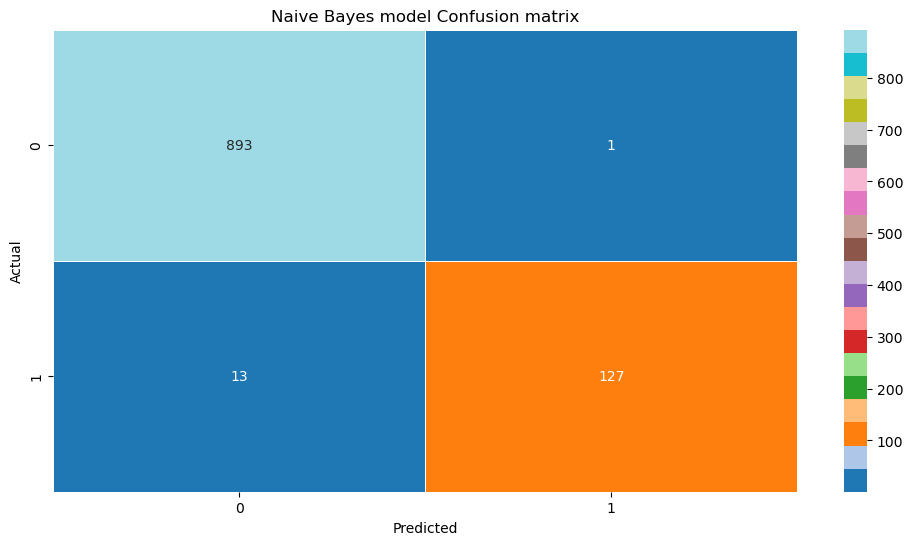

In [70]:
cm=confusion_matrix(y_test,y_pred)

plt.figure(figsize=(12,6))
sns.heatmap(cm,annot=True,cmap='tab20',linewidth=0.5,fmt='d')
plt.title("Naive Bayes model Confusion matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [71]:
import pickle
pickle.dump(tf,open('vectorizer.pkl','wb'))
pickle.dump(modelBNB,open('model.pkl','wb'))